## STMO Project

In [2]:
import osmnx as ox
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

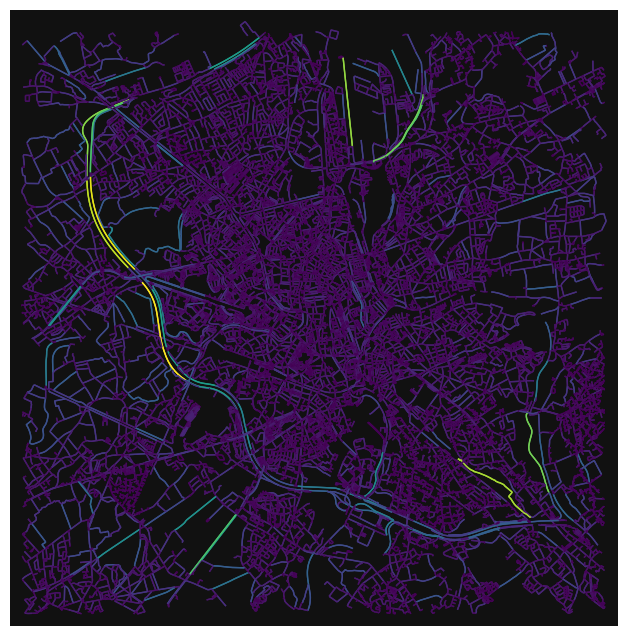

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
# Define the address as a starting point
center = "Sint-kwintensberg 74, Ghent, Belgium"

# Geocode the address to get its latitude and longitude
center_point = ox.geocode(center)

# Define the buffer distance (in meters) for the map area
buffer_distance = 6000  # 2 km radius

# Download the street network data within the buffer distance around the center point
graph = ox.graph_from_point(center_point, dist=buffer_distance, network_type='walk')
graph = ox.distance.add_edge_lengths(graph)

# Plot the graph to verify
ec = ox.plot.get_edge_colors_by_attr(graph, attr='length')
ox.plot_graph(graph, edge_color=ec, node_alpha=0)

In [5]:
city_nodes, city_edges = ox.graph_to_gdfs(graph)
city_nodes

,y,x,street_count,highway,railway,ref,geometry
osmid,,,,,,,
145679,51.003726,3.769753,1,NaN,NaN,NaN,POINT (3.76975 51.00373)
145715,51.012885,3.734588,3,NaN,NaN,NaN,POINT (3.73459 51.01288)
145763,51.031829,3.732254,3,NaN,NaN,NaN,POINT (3.73225 51.03183)
145785,51.038644,3.725182,3,NaN,NaN,NaN,POINT (3.72518 51.03864)
145786,51.039828,3.723309,4,NaN,NaN,NaN,POINT (3.72331 51.03983)
...,...,...,...,...,...,...,...
12431244681,51.095528,3.795176,3,NaN,NaN,NaN,POINT (3.79518 51.09553)
12431669915,51.069330,3.782478,3,NaN,NaN,NaN,POINT (3.78248 51.06933)
12431669917,51.069350,3.782983,3,NaN,NaN,NaN,POINT (3.78298 51.06935)


In [6]:
city_edges.name

u            v            key
145679       96158030     0                               Buitenring Merelbeke
145715       56537191     0                              Binnenring-Zwijnaarde
             205294656    0      [Binnenring Merelbeke, Binnenring-Zwijnaarde]
             2040932329   0                                                NaN
145763       10608884795  0          [Achilles Heyndrickxlaan, Burggravenlaan]
                                                     ...                      
12431669918  7938348732   0                                 Achtenkouterstraat
             12431669926  0                                                NaN
12431669926  12431669918  0                                                NaN
             1453819527   0                                                NaN
             12312641478  0                                                NaN
Name: name, Length: 76582, dtype: object

In [58]:
# Points of interest: Gravensteen: Sint-Veerleplein 11 9000 Gent, Museum of industry: Minnemeers 10, Flowrts for sint rita: Sint-Margrietstraat, Lievekaai
# Define the addresses
addresses = {
    "Gravensteen": "Sint-Veerleplein 11 9000 Gent, Belgium",
    "Museum of Industry": "Minnemeers 10, Gent, Belgium",
    "Sint Rita": "Sint-Margrietstraat", 
    "Lievekaai": "Lievenkaai"
}

In [ ]:
for u, v, data in graph.edges(data=True):
    data['length'] = data['length'] / 1000  # Convert meters to kilometers

Route from start to target (in kilometers):
532229886 0
48234695 53.75265439617977
41336300 117.60552211438518
6676039947 170.10630880042928
1297181704 213.49595392282015
245090873 283.22143972279537
41336293 339.6112366669071
245419768 350.8570878180227
41336296 370.98316028729664
41336287 386.53177852148644
1507820403 540.8191381459783
5327959450 567.8422524188603
1787493063 580.3110121288239
2229540528 715.5972264957154
2229540522 731.4339486525761
2229540518 746.8738415890289
2229540501 791.9396872292814
2229540492 816.0707228653217
2229540483 831.0170549837183
2229540477 928.6165997790149
2229540470 935.6064892812084
2229540462 997.3715847280299
2229540458 1011.8583319688707
6725154982 1076.6981541856946
2287935104 1080.7195070421499
2287935091 1094.1780855212057
6725154984 1100.0656876880307
36741589 1148.450514755251
26268555 1202.5541279209008
26268554 1235.914417707328
1995841990 1254.23710421209
26268553 1345.4012729213837
2074746625 1408.0049119153732
3432154526 1427.6976617

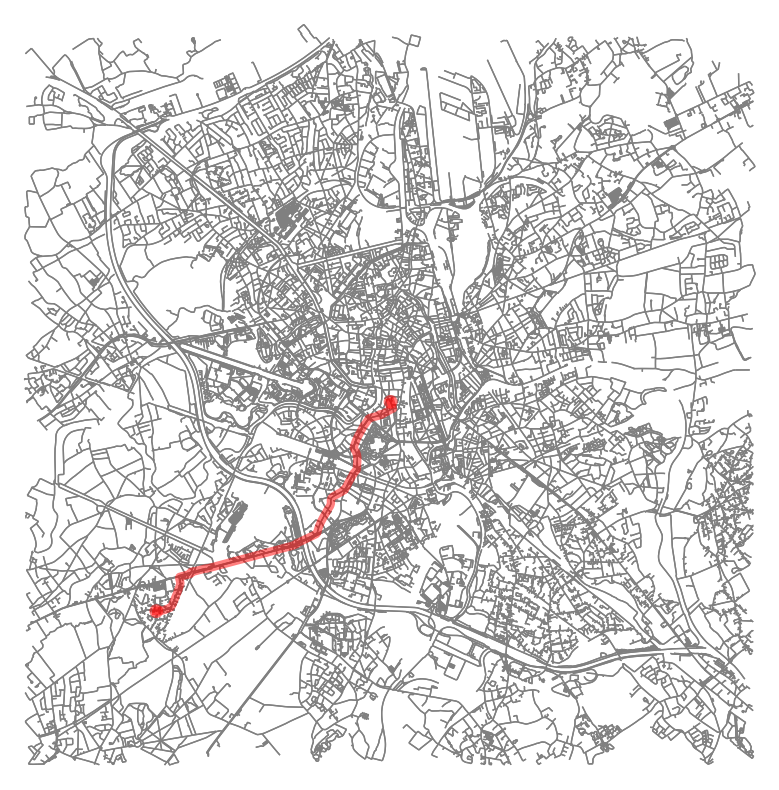

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [39]:
from geopy.geocoders import Nominatim 
# Define a start address:
start_adress = "Sint-kwintensberg 74, Ghent"
geolocator = Nominatim(user_agent="STMO_project")
location = geolocator.geocode(start_adress)
start_lat, start_lon = location.latitude, location.longitude

start_node = ox.distance.nearest_nodes(graph, X=start_lon, Y=start_lat)

# Run Dijkstra's algorithm to get the shortest paths from the start node
distances, predecessors = nx.single_source_dijkstra(graph, source=start_node, weight='length')  # 'length' is the edge attribute for distance

# Set target distance (5 km)
target_distance = 6000  # in kilometers
threshold = 50  # in kilometers (± 200 meters)

# Filter nodes that are within the threshold distance
close_nodes = {node: distance for node, distance in distances.items() if abs(distance - target_distance) <= threshold}

# Select a target node, the one that is about 5 km away (choose any from close_nodes)
target_node = list(close_nodes.keys())[20]  # Select the first node (or choose based on your preference)

# Get the specific route between start_node and target_node
route = nx.shortest_path(graph, source=start_node, target=target_node, weight='length')

# Print the nodes along the route
print("Route from start to target (in kilometers):")
for node in route:
    print(node, distances[node])

# Visualize the route on the map
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the full graph
ox.plot_graph(graph, ax=ax, node_size=0, edge_color='gray', bgcolor='white', show=False)
# Plot the specific route
ox.plot_graph_route(graph, route, route_linewidth=6, node_size=0, bgcolor='white', ax=ax, show=True)

# You can save the plot to a file if needed
# plt.savefig('route_map.png', dpi=300)


In [35]:
target_nodes

[1308850171, 12186535522, 2927400950, 4619794597, 7830474200]

In [28]:
city_nodes[city_nodes.index == 8281475649]



,y,x,street_count,highway,railway,ref,geometry
osmid,,,,,,,
8281475649,50.991585,3.809406,3,NaN,NaN,NaN,POINT (3.80941 50.99159)


In [30]:
start_lat, start_lon

(51.0444981, 3.7238423106651513)

In [61]:
close_nodes

{1648542657: 1.5002542136609918,
 1733630713: 1.5009138786222915,
 798704773: 1.5023314062686053,
 798729712: 1.504871743510522,
 4000514194: 1.5074062068583398,
 798729433: 1.5145357043074168,
 1648536485: 1.5166785016585518,
 1602233679: 1.517726969799882,
 3520202313: 1.5179064550543382,
 798729423: 1.518306488996671,
 4018135793: 1.519767637145688,
 300977126: 1.5289101900898057,
 12222729461: 1.529936711589784,
 1648536462: 1.5329543318081769,
 300977046: 1.537939301901427,
 12154910605: 1.5407957195851805,
 1648536466: 1.541120832158154,
 4018135791: 1.5428735073702342,
 1747803430: 1.545972387441009,
 300976984: 1.548865328801597,
 11930072494: 1.5686409327447266,
 300977047: 1.5732503921155554,
 1648508204: 1.583343219185734,
 4000725815: 1.5836270257741178,
 1602233681: 1.5841370737061558,
 4018148907: 1.5917918913630618,
 1602223288: 1.5950298967857246,
 1733629559: 1.5987651988630898,
 11401713633: 1.6096215973493748,
 1733630705: 1.6106877578413317,
 11930072493: 1.61245363